## FASE 2 - Análisis Exploratorio (EDA) + Preprocesamiento

##### 1. Carga del dataset y primera extracción de columnas relevantes

In [2]:
import pandas as pd

training_data = pd.read_csv('../tmp/training_data.csv')

In [3]:
print(f'Size of training data: {training_data.shape}')
training_data.dtypes

Size of training data: (840324, 16)


id                       int64
measure_id              object
monitor_id              object
landmark_id              int64
landmark_type           object
dst_ip                  object
ping_rtt1              float64
ping_rtt2              float64
ping_rtt3              float64
ping_rtt4              float64
ping_rtt5              float64
ping_rtt_avg           float64
ping_rtt_std           float64
direct_distance_kms    float64
init_time               object
end_time                object
dtype: object

In [4]:
training_data = training_data[[
    "measure_id", 
    "monitor_id", 
    "landmark_id", 
    "landmark_type", 
    "dst_ip", 
    "ping_rtt_avg", 
    "ping_rtt_std", 
    "direct_distance_kms", 
    "init_time"
]]

# Tipos de datos
training_data.dtypes

measure_id              object
monitor_id              object
landmark_id              int64
landmark_type           object
dst_ip                  object
ping_rtt_avg           float64
ping_rtt_std           float64
direct_distance_kms    float64
init_time               object
dtype: object

##### 2. Añadido de columnas con franjas horarias para su posterior análisis

In [5]:
# Dependiendo del valor de la columna init_time, añadimos nuevas columnas asociandolo a diferentes franjas horarias
# 1. Cada 2 horas -> 00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00
# 2. Cada 6 horas -> 00:00, 06:00, 12:00, 18:00
# 3. Cada 12 horas -> 00:00, 12:00

training_data['init_time'] = pd.to_datetime(training_data['init_time'])

# Obtenemos únicamente la hora (es en lo que nos vamos a basar para dividir en franjas horarias)
training_data_hour = training_data['init_time'].dt.hour

# Creamos las columnas con las franjas horarias
training_data['init_time_2h'] = training_data_hour.apply(lambda x: x - x % 2)
training_data['init_time_6h'] = training_data_hour.apply(lambda x: x - x % 6)
training_data['init_time_12h'] = training_data_hour.apply(lambda x: x - x % 12)

# Mostramos el número de registros por cada franja horaria
print(training_data['init_time_2h'].value_counts())
print(training_data['init_time_6h'].value_counts())
print(training_data['init_time_12h'].value_counts())

init_time_2h
20    73446
14    73158
18    72456
16    72456
22    71346
0     69906
12    69540
2     69018
4     67530
6     67332
10    67254
8     66882
Name: count, dtype: int64
init_time_6h
18    217248
12    215154
0     206454
6     201468
Name: count, dtype: int64
init_time_12h
12    432402
0     407922
Name: count, dtype: int64


##### 3. Codificación de variables categóricas a numéricas

In [6]:
# Convertimos monitor_id a valor numerico
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_data["monitor_id"] = le.fit_transform(training_data["monitor_id"])

training_data.head()

,measure_id,monitor_id,landmark_id,landmark_type,dst_ip,ping_rtt_avg,ping_rtt_std,direct_distance_kms,init_time,init_time_2h,init_time_6h,init_time_12h
0,95.217.19.69_2024-11-27 13:31:04,4,9404,ripe_anchor,95.217.19.69,43.3216,0.09509,934.999404,2024-11-27 13:31:04,12,12,12
1,95.217.19.69_2024-11-27 13:31:04,1,9404,ripe_anchor,95.217.19.69,29.9146,0.15830,1530.246007,2024-11-27 13:31:04,12,12,12
2,95.217.19.69_2024-11-27 13:31:04,5,9404,ripe_anchor,95.217.19.69,44.2758,0.16121,1954.678802,2024-11-27 13:31:04,12,12,12
3,95.217.19.69_2024-11-27 13:31:04,0,9404,ripe_anchor,95.217.19.69,58.5782,0.25197,2963.403860,2024-11-27 13:31:04,12,12,12
4,95.217.19.69_2024-11-27 13:31:04,2,9404,ripe_anchor,95.217.19.69,44.5080,0.34878,2031.641470,2024-11-27 13:31:04,12,12,12


In [7]:
# Mostramos qué etiquetas se han asignado a cada monitor_id
le.classes_

array(['monitor_1_Madrid_ES', 'monitor_2_Frankfurt am Main_DE',
       'monitor_3_Dublin_IE', 'monitor_4_Gävle_SE', 'monitor_5_Warsaw_PL',
       'monitor_6_Milan_IT'], dtype=object)

##### 4. Descripción del dataframe

In [8]:
training_data.describe()

,monitor_id,landmark_id,ping_rtt_avg,ping_rtt_std,direct_distance_kms,init_time,init_time_2h,init_time_6h,init_time_12h
count,840324.000000,840324.000000,840324.000000,840324.000000,840324.000000,840324,840324.000000,840324.000000,840324.000000
mean,2.500000,13610.510439,36.124230,4.598907,1168.682662,2024-12-25 12:35:43.876561920,11.162923,9.164465,6.174790
min,0.000000,8868.000000,-1.000000,0.000000,0.582653,2024-11-27 13:31:04,0.000000,0.000000,0.000000
25%,1.000000,10848.000000,21.818800,0.122020,707.389377,2024-12-07 10:47:51,6.000000,6.000000,0.000000
50%,2.500000,13347.000000,34.301700,0.250800,1147.991667,2024-12-21 14:16:03.500000,12.000000,12.000000,12.000000
75%,4.000000,15383.000000,44.760400,0.609132,1528.043019,2025-01-10 11:08:17,18.000000,18.000000,12.000000
max,5.000000,20246.000000,2956.242200,1803.416000,4415.342017,2025-02-06 22:37:44,22.000000,18.000000,12.000000
std,1.707826,3240.753758,56.607848,48.858219,630.026576,NaN,6.930301,6.728768,5.997457


##### 5. Visualización de datos

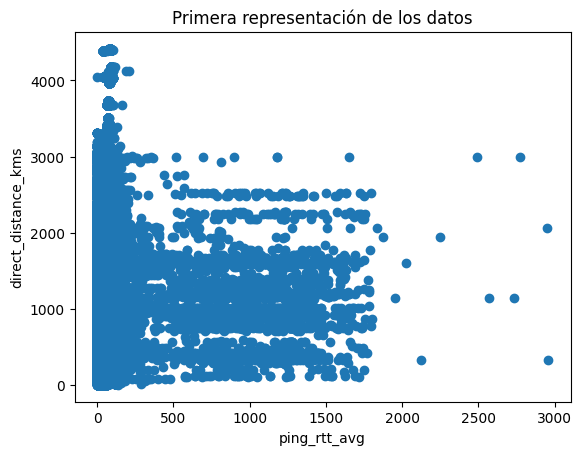

In [9]:
import matplotlib.pyplot as plt

plt.scatter(training_data["ping_rtt_avg"], training_data["direct_distance_kms"])
plt.xlabel("ping_rtt_avg")
plt.ylabel("direct_distance_kms")
plt.title("Primera representación de los datos")	
plt.show()

##### 6. Primera limpieza a partir de ping y distancia

In [10]:
# Número total de entradas
print("Número total de entradas: ", len(training_data))
# Número de entradas con un ping_rtt_avg mayor a 80 ms
print("Número de entradas con un ping_rtt_avg mayor a 80 ms: ", len(training_data[training_data["ping_rtt_avg"] > 80]))
# Número de entradas con un ping_rtt_avg menor a 0 ms
print("Número de entradas con un ping_rtt_avg menor a 0 ms: ", len(training_data[training_data["ping_rtt_avg"] < 0]))
# Número de entradas con un direct_distance_kms menor a 50 km y un ping_rtt_avg mayor a 10 ms
print("Número de entradas con un direct_distance_kms menor a 50 km y un ping_rtt_avg mayor a 10 ms: ", len(training_data[(training_data["direct_distance_kms"] < 50) & (training_data["ping_rtt_avg"] > 10)]))

Número total de entradas:  840324
Número de entradas con un ping_rtt_avg mayor a 80 ms:  12386
Número de entradas con un ping_rtt_avg menor a 0 ms:  49471
Número de entradas con un direct_distance_kms menor a 50 km y un ping_rtt_avg mayor a 10 ms:  3805


Número de entradas tras la limpieza: 774693


Text(0, 0.5, 'direct_distance_kms (kms)')

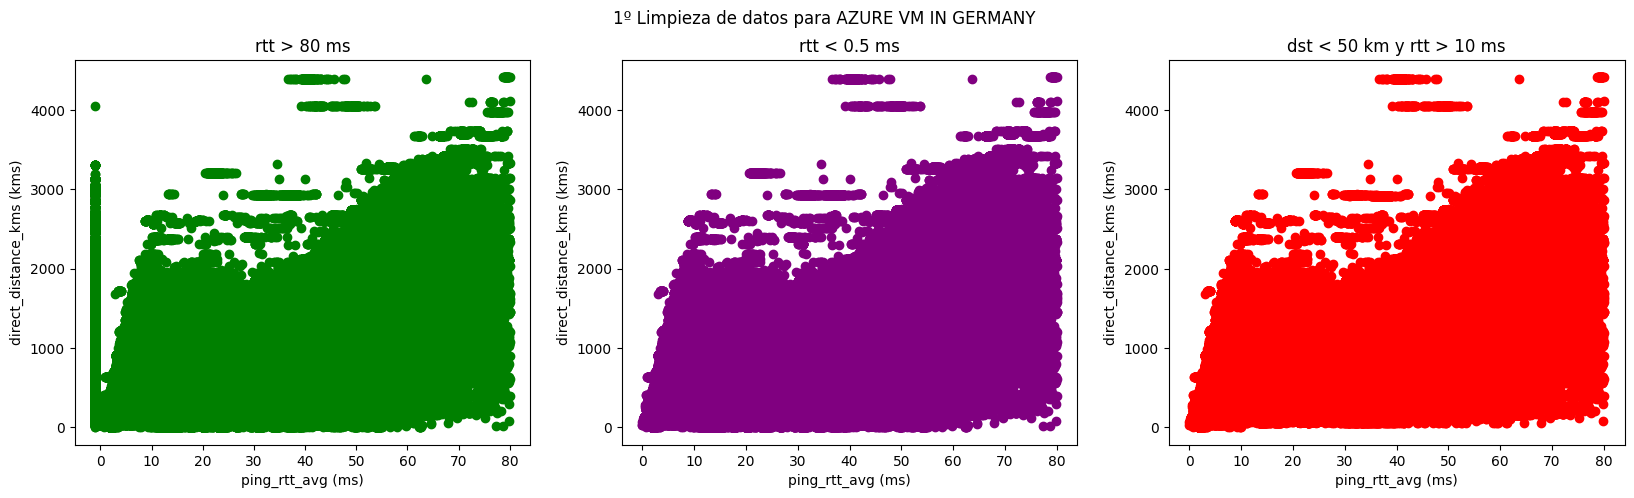

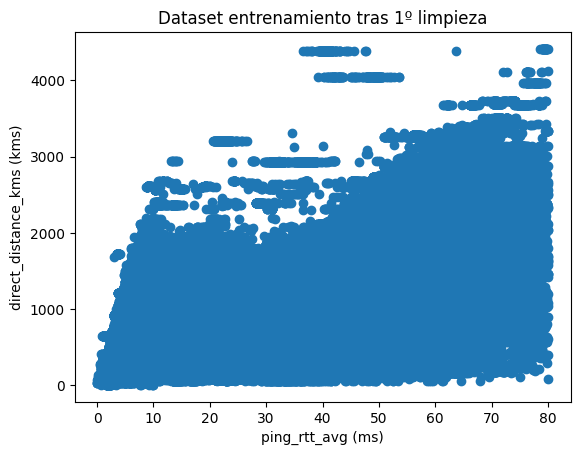

In [11]:
# Creamos una figura con 3 subgráficas
plt.figure(figsize=(20, 5))
plt.suptitle('1º Limpieza de datos para AZURE VM IN GERMANY')

# Eliminamos aquellas filas del df con un rtt mayor de 80ms
training_data = training_data[training_data['ping_rtt_avg'] < 80]

plt.subplot(1, 3, 1)
plt.scatter(training_data['ping_rtt_avg'], training_data['direct_distance_kms'], color='green')
plt.xlabel('ping_rtt_avg (ms)')
plt.ylabel('direct_distance_kms (kms)')
plt.title('rtt > 80 ms')

# Eliminamos aquellas filas con un rtt menor a 0 ms
training_data = training_data[training_data['ping_rtt_avg'] > 0]

plt.subplot(1, 3, 2)
plt.scatter(training_data['ping_rtt_avg'], training_data['direct_distance_kms'], color='purple')
plt.xlabel('ping_rtt_avg (ms)')
plt.ylabel('direct_distance_kms (kms)')
plt.title('rtt < 0.5 ms')

# Eliminamos aquellas filas con un a distancia menor a 50 km y un rtt mayor a 10 ms
training_data = training_data[~((training_data['direct_distance_kms'] < 50) & (training_data['ping_rtt_avg'] > 10))]

plt.subplot(1, 3, 3)
plt.scatter(training_data['ping_rtt_avg'], training_data['direct_distance_kms'], color='red')
plt.xlabel('ping_rtt_avg (ms)')
plt.ylabel('direct_distance_kms (kms)')
plt.title('dst < 50 km y rtt > 10 ms')

# Mostramos el número de entradas tras la limpieza
print(f"Número de entradas tras la limpieza: {training_data.shape[0]}")

# Representamos en una gráfica la columna ping_rtt_avg frente a direct_distance_kms
plt.figure()
plt.scatter(training_data['ping_rtt_avg'], training_data['direct_distance_kms'])
plt.title('Dataset entrenamiento tras 1º limpieza')
plt.xlabel('ping_rtt_avg (ms)')
plt.ylabel('direct_distance_kms (kms)')

##### 7. Eliminación de outliers mediante clustering DBSCAN

In [12]:
# # Hacemos uso de DBSCAN para detectar outliers
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Supongamos que df_ge es tu DataFrame con las columnas 'direct_distance_kms' y 'ping_rtt_avg'

# # Escalamos los datos
# scaler = StandardScaler()
# X = training_data[['ping_rtt_avg', 'direct_distance_kms']]
# X = scaler.fit_transform(X)

# # Creamos el modelo DBSCAN
# dbscan = DBSCAN(eps=0.2, min_samples=40)

# # Predecimos los clusters
# clusters = dbscan.fit_predict(X)

# # Añadimos una columna al dataframe con los clusters
# training_data['cluster'] = clusters

# # Obtener número de clusters (excluyendo el ruido)
# n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

# # Crear colores para cada cluster
# unique_labels = set(clusters)
# colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# # Representar en una gráfica los clusters
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Color negro para el ruido
#         col = 'k'
    
#     class_member_mask = (clusters == k)
    
#     xy = training_data[class_member_mask]
#     plt.scatter(xy['ping_rtt_avg'], xy['direct_distance_kms'], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise')

# # Añadimos etiquetas a los ejes y título
# plt.ylabel('direct_distance_kms (kms)')
# plt.xlabel('ping_rtt_avg (ms)')
# plt.title('Detección de Outliers con DBSCAN para Dataset Entrenamiento')

# # Añadimos la leyenda
# plt.legend()

# # Mostramos la gráfica
# plt.show()

In [13]:
# print(f"Número de entradas antes de eliminar ruido: {len(training_data)}")

# # Eliminamos lo que el clustering ha considerado como ruido
# training_data = training_data[training_data['cluster'] != -1]

# # Eliminamos la columna cluster
# training_data = training_data.drop(columns='cluster')

# print(f"Número de entradas después de eliminar ruido: {len(training_data)}")

# # Representamos el dataframe
# training_data.plot(x='ping_rtt_avg', y='direct_distance_kms', kind='scatter')
# plt.title('Dataset entrenamiento tras DBSCAN')
# plt.ylabel('direct_distance_kms (kms)')
# plt.xlabel('ping_rtt_avg (ms)')
# plt.show()

##### 8. Correlación entre variables y target

In [14]:
# # Pairplot, eje y es direct_distance_kms
# import seaborn as sns

# sns.pairplot(training_data, y_vars='direct_distance_kms', x_vars=['monitor_id', 'ping_rtt_avg', 'ping_rtt_std', 'traceroute_hops', 'valid_geo_total_kms', 'init_time_2h', 'init_time_6h', 'init_time_12h'])

In [15]:
# # Observamos que hay valores atípicos en la columna ping_rtt_std mayor a 20 y en valid_geo_total_kms mayor a 40000, eliminamos estos valores
# training_data = training_data[training_data['ping_rtt_std'] < 20]
# training_data = training_data[training_data['valid_geo_total_kms'] < 40000]

# sns.pairplot(training_data, y_vars='direct_distance_kms', x_vars=['monitor_id', 'ping_rtt_avg', 'ping_rtt_std', 'traceroute_hops', 'valid_geo_total_kms', 'init_time_2h', 'init_time_6h', 'init_time_12h'])

In [16]:
# Matriz de correlación sobre la columna direct_distance_kms. No lo hacemos con las columnas measure_id y init_time
correlation_matrix = training_data.drop(columns=['measure_id', 'dst_ip', 'landmark_id', 'landmark_type', 'init_time']).corr()
print(correlation_matrix['direct_distance_kms'])

monitor_id            -0.174394
ping_rtt_avg           0.642008
ping_rtt_std          -0.025938
direct_distance_kms    1.000000
init_time_2h          -0.001499
init_time_6h          -0.001673
init_time_12h         -0.001740
Name: direct_distance_kms, dtype: float64


Condición --> escogemos aquellas variables que tengan una correlación mayor al 30% con el target

##### 9. Extracción de columnas relevantes para entrenamiento

In [17]:
# Nos quedamos con las columnas más relevantes (measure_id, ahchor_id y dst_ip las guardamos para identificar las entradas)
training_data = training_data[['measure_id', 'monitor_id', 'landmark_id', 'landmark_type', 'dst_ip', 'ping_rtt_avg', 'direct_distance_kms', 'init_time']]
training_data.head()

,measure_id,monitor_id,landmark_id,landmark_type,dst_ip,ping_rtt_avg,direct_distance_kms,init_time
0,95.217.19.69_2024-11-27 13:31:04,4,9404,ripe_anchor,95.217.19.69,43.3216,934.999404,2024-11-27 13:31:04
1,95.217.19.69_2024-11-27 13:31:04,1,9404,ripe_anchor,95.217.19.69,29.9146,1530.246007,2024-11-27 13:31:04
2,95.217.19.69_2024-11-27 13:31:04,5,9404,ripe_anchor,95.217.19.69,44.2758,1954.678802,2024-11-27 13:31:04
3,95.217.19.69_2024-11-27 13:31:04,0,9404,ripe_anchor,95.217.19.69,58.5782,2963.403860,2024-11-27 13:31:04
4,95.217.19.69_2024-11-27 13:31:04,2,9404,ripe_anchor,95.217.19.69,44.5080,2031.641470,2024-11-27 13:31:04


##### 10. Generación del Dataset KNN Fingerprint

In [18]:
# Generación del dataset fingerprint para KNN. Va a contener:
# - El identificador de la medida (measure_id)
# - El identificador del Anchor (anchor_id)
# - La IP destino (dst_ip)
# - Timestamp (init_time)
# - Una columna por latencia (latency_m1, latency_m2, latency_m2, latency_m4)
# - GPS (gps_lat, gps_lon) real --> Variable objetivo

In [19]:
# Cargamos el dataset de Anchors para asociar la latitud y longitud a cada Anchor
anchors = pd.read_csv('../../../Datasets/Anchors.csv')

# Cargamos el dataset de Probes para asociar la latitud y longitud a cada Probe
probes = pd.read_csv('../../../Datasets/ripe_atlas_probes.csv')

print(f'Size of anchors: {anchors.shape}')
print(f'Size of probes: {probes.shape}')

Size of anchors: (1341, 23)
Size of probes: (52044, 23)


In [20]:
# Hay duplicados en la columna 'ip_v4' que debemos eliminar
anchors = anchors.drop_duplicates(subset=['ip_v4'])

# Renombramos la columna 'ip_v4' por 'dst_ip' para poder unir los dataframes
anchors.rename(columns={'ip_v4': 'dst_ip'}, inplace=True)

# Renombramos la columna 'address_v4' por 'dst_ip' en probes para poder unir los dataframes
probes.rename(columns={'address_v4': 'dst_ip'}, inplace=True)

In [21]:
# Si hay probes con la misma IP que los anchors, los eliminamos
print(f'Número de probes antes de eliminar los anchors: {probes.shape[0]}')
probes = probes[~probes['dst_ip'].isin(anchors['dst_ip'])]
print(f'Número de probes después de eliminar los anchors: {probes.shape[0]}')

Número de probes antes de eliminar los anchors: 52044
Número de probes después de eliminar los anchors: 50713


In [22]:
# Unimos los dataframes de probes y anchors, quedándonos con las columnas 'dst_ip', 'latitude', 'longitude'
anchors_probes = pd.concat([anchors[['dst_ip', 'latitude', 'longitude']], probes[['dst_ip', 'latitude', 'longitude']]])
print(f'Size of anchors_probes: {anchors_probes.shape}')

# Eliminamos las filas duplicadas
anchors_probes = anchors_probes.drop_duplicates(subset=['dst_ip'])
print(f'Size of anchors_probes after drop duplicates: {anchors_probes.shape}')

Size of anchors_probes: (51978, 3)
Size of anchors_probes after drop duplicates: (29174, 3)


In [23]:
print(f'Size of training_data: {training_data.shape}')

# Unimos los dataframes training_data y anchors_probes
training_data = pd.merge(training_data, anchors_probes[['dst_ip', 'latitude', 'longitude']], on='dst_ip', how='left')

# Mostramos las primeras filas del dataframe
print(f'Size of training_data: {training_data.shape}')
training_data.head()


Size of training_data: (774693, 8)
Size of training_data: (774693, 10)


,measure_id,monitor_id,landmark_id,landmark_type,dst_ip,ping_rtt_avg,direct_distance_kms,init_time,latitude,longitude
0,95.217.19.69_2024-11-27 13:31:04,4,9404,ripe_anchor,95.217.19.69,43.3216,934.999404,2024-11-27 13:31:04,60.34167,25.027666
1,95.217.19.69_2024-11-27 13:31:04,1,9404,ripe_anchor,95.217.19.69,29.9146,1530.246007,2024-11-27 13:31:04,60.34167,25.027666
2,95.217.19.69_2024-11-27 13:31:04,5,9404,ripe_anchor,95.217.19.69,44.2758,1954.678802,2024-11-27 13:31:04,60.34167,25.027666
3,95.217.19.69_2024-11-27 13:31:04,0,9404,ripe_anchor,95.217.19.69,58.5782,2963.403860,2024-11-27 13:31:04,60.34167,25.027666
4,95.217.19.69_2024-11-27 13:31:04,2,9404,ripe_anchor,95.217.19.69,44.5080,2031.641470,2024-11-27 13:31:04,60.34167,25.027666


In [24]:
# Nos quedamos de training data por las entradas con un measure_id que aparezca 6 veces (los 6 monitores)
print(f"Número de entradas antes de eliminar medidas faltantes: {len(training_data)}")
training_data = training_data[training_data['measure_id'].map(training_data['measure_id'].value_counts()) == 6]
print(f"Número de entradas después de eliminar medidas faltantes: {len(training_data)}")

Número de entradas antes de eliminar medidas faltantes: 774693
Número de entradas después de eliminar medidas faltantes: 709998


In [25]:
# Por cada measure_id, generamos el dataset fingerprint
from tqdm import tqdm

# Creamos un dataframe vacío con las columnas que vamos a necesitar
fingerprint = pd.DataFrame(columns=['measure_id', 'landmark_id', 'dst_ip', 'init_time', 'latency_m1', 'latency_m2', 'latency_m3', 'latency_m4', 'latency_m5', 'latency_m6', 'gps_coord'])

# Obtenemos los measure_id únicos
measure_ids = training_data['measure_id'].unique()

# Iteramos sobre los measure_id
for measure_id in tqdm(measure_ids, desc="Generando fingerprint"):
    # Obtenemos las entradas asociadas a ese measure_id
    measure_data = training_data[training_data['measure_id'] == measure_id]
    # print(measure_data)

    # Obtenemos las latencias además del id del monitor
    latencies = measure_data[['monitor_id', 'ping_rtt_avg']].values
    # print(latencies)
    
    # Obtenemos las coordenadas GPS
    gps = measure_data[['latitude', 'longitude']].values[0]
    
    # Obtenemos el landmark_id, dst_ip y init_time
    landmark_id = measure_data['landmark_id'].values[0]
    dst_ip = measure_data['dst_ip'].values[0]
    init_time = measure_data['init_time'].values[0]
    
    # Añadimos una nueva entrada al dataframe fingerprint
    fingerprint_id = pd.DataFrame(
        {
            'measure_id': [measure_id],
            'landmark_id': [landmark_id],
            'dst_ip': [dst_ip],
            'init_time': [init_time],
            'latency_m1': [latencies[latencies[:, 0] == 0, 1][0]],
            'latency_m2': [latencies[latencies[:, 0] == 1, 1][0]],
            'latency_m3': [latencies[latencies[:, 0] == 2, 1][0]],
            'latency_m4': [latencies[latencies[:, 0] == 3, 1][0]],
            'latency_m5': [latencies[latencies[:, 0] == 4, 1][0]],
            'latency_m6': [latencies[latencies[:, 0] == 5, 1][0]],
            'gps_coord': [gps]
        },
        index=[0]
    )
    fingerprint = pd.concat([fingerprint, fingerprint_id], ignore_index=True)

# Mostramos las primeras filas del dataframe fingerprint
print(f'Size of fingerprint: {fingerprint.shape}')
fingerprint.head()

Generando fingerprint:   0%|          | 0/118333 [00:00<?, ?it/s]C:\Users\ma.ortega\AppData\Local\Temp\ipykernel_19176\214282353.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fingerprint = pd.concat([fingerprint, fingerprint_id], ignore_index=True)
Generando fingerprint: 100%|██████████| 118333/118333 [1:16:48<00:00, 25.68it/s]

Size of fingerprint: (118333, 11)


,measure_id,landmark_id,dst_ip,init_time,latency_m1,latency_m2,latency_m3,latency_m4,latency_m5,latency_m6,gps_coord
0,95.217.19.69_2024-11-27 13:31:04,9404,95.217.19.69,2024-11-27 13:31:04,58.5782,29.9146,44.5080,30.9156,43.3216,44.2758,"[60.3416703, 25.0276663]"
1,45.13.104.153_2024-11-27 13:31:11,9042,45.13.104.153,2024-11-27 13:31:11,31.8330,24.0060,31.6050,40.1600,41.6678,33.8332,"[45.7615, 4.8395]"
2,212.216.126.87_2024-11-27 13:32:12,11265,212.216.126.87,2024-11-27 13:32:12,39.2582,24.6598,40.5294,45.7428,38.6770,37.7004,"[44.8215, 11.5995]"
3,31.21.219.185_2024-11-27 13:32:28,13743,31.21.219.185,2024-11-27 13:32:28,38.3488,16.2102,24.1406,33.0970,33.7898,27.4372,"[51.4505, 5.4505]"
4,194.1.149.210_2024-11-27 13:33:37,9117,194.1.149.210,2024-11-27 13:33:37,47.2120,29.2842,50.2400,56.8978,62.3142,54.1528,"[41.324873, 19.816192]"


In [29]:
# Guardamos el dataframe fingerprint en un archivo CSV
fingerprint.to_csv('../tmp/fingerprint_extended.csv', index=False)

In [30]:
# Para evitar confusión con múltiples medidas a un mismo anchor, vamos a agrupar por anchor_id y dst_ip, y a quedarnos con la mediana de las latencias

# Obtenemos los dst_ip únicos
dst_ips = fingerprint['dst_ip'].unique()
print(f"Número de dst_ip únicas: {len(dst_ips)}")
print(f"Tamaño del dataframe fingerprint antes de agrupar: {fingerprint.shape}")

# Creamos el dataframe final
fingerprint_final = pd.DataFrame(columns=['landmark_id', 'dst_ip', 'init_time', 'latency_m1', 'latency_m2', 'latency_m3', 'latency_m4', 'latency_m5', 'latency_m6', 'gps_coord'])

# Iteramos sobre los dst_ip
for dst_ip in dst_ips:
    # Obtenemos las entradas asociadas a ese dst_ip
    dst_ip_data = fingerprint[fingerprint['dst_ip'] == dst_ip]
    
    # Obtenemos el anchor_id y la coordenada GPS
    landmark_id = dst_ip_data['landmark_id'].values[0]
    gps_coord = dst_ip_data['gps_coord'].values[0]
    
    # Obtenemos la mediana de las latencias -> como es par, la mediana es la media de los dos valores centrales
    latencies = dst_ip_data[['latency_m1', 'latency_m2', 'latency_m3', 'latency_m4', 'latency_m5', 'latency_m6']].median().values
    
    # Obtenemos la fecha de la mediana de las fechas
    init_time = dst_ip_data['init_time'].values[0]
    
    # Añadimos una nueva entrada al dataframe fingerprint
    fingerprint_id = pd.DataFrame(
        {
            'landmark_id': [landmark_id],
            'dst_ip': [dst_ip],
            'init_time': [init_time],
            'latency_m1': [latencies[0]],
            'latency_m2': [latencies[1]],
            'latency_m3': [latencies[2]],
            'latency_m4': [latencies[3]],
            'latency_m5': [latencies[4]],
            'latency_m6': [latencies[5]],
            'gps_coord': [gps_coord]
        },
        index=[0]
    )
    fingerprint_final = pd.concat([fingerprint_final, fingerprint_id], ignore_index=True)

print(f"Tamaño del dataframe fingerprint después de agrupar: {fingerprint_final.shape}")

# Mostramos las primeras filas del dataframe fingerprint
fingerprint_final.head()

Número de dst_ip únicas: 1023
Tamaño del dataframe fingerprint antes de agrupar: (118333, 11)


C:\Users\ma.ortega\AppData\Local\Temp\ipykernel_19176\2517804072.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fingerprint_final = pd.concat([fingerprint_final, fingerprint_id], ignore_index=True)


Tamaño del dataframe fingerprint después de agrupar: (1023, 10)


,landmark_id,dst_ip,init_time,latency_m1,latency_m2,latency_m3,latency_m4,latency_m5,latency_m6,gps_coord
0,9404,95.217.19.69,2024-11-27 13:31:04,58.4238,23.9844,44.0702,30.7952,43.3780,41.9054,"[60.3416703, 25.0276663]"
1,9042,45.13.104.153,2024-11-27 13:31:11,27.7819,19.9025,27.0787,38.9920,37.1721,29.6870,"[45.7615, 4.8395]"
2,11265,212.216.126.87,2024-11-27 13:32:12,39.1292,22.3198,40.5458,55.8268,52.9606,37.7030,"[44.8215, 11.5995]"
3,13743,31.21.219.185,2024-11-27 13:32:28,38.3488,16.2700,23.5662,33.0926,42.3170,27.4364,"[51.4505, 5.4505]"
4,9117,194.1.149.210,2024-11-27 13:33:37,53.0078,31.3984,50.6929,57.3349,59.3433,49.8386,"[41.324873, 19.816192]"


##### 11. Guardado del dataset Fingerprint

In [31]:
# Guardamos el dataset limpio
fingerprint_final.to_csv('../tmp/fingerprintKNN_train.csv', index=False)